## Assignment

The features to analyze:

VitD_levels

Doc_visits

TotalCharge

For each feature listed:

Plot a histogram with a kde (kernel density estimate)

Add a line for the mean (red)

Add a line for the median (green)

Add a line for for +1 std from the mean (black)

Add a line for the - 1 std from the mean (black)

Highlight the range between +1 and =1 std (yellow)

Answer the following questions:

Is it Discrete or Continuous?

Does it have a skew? If so, which direction (+/-)

What type of kurtosis does it display? 

(Mesokurtic, Leptokurtic, Platykurtic)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats


In [16]:
# creating folder to save files 
import os
os.makedirs('Data/',exist_ok=True) 
# Confirm folder created
os.listdir("Data/")

['data (5).csv']

In [17]:
filename='Data/data (5).csv'
df=pd.read_csv(filename)
df.head(5)

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [24]:
def plot_func(column,dataframe):
    feature = dataframe[column]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature ,ax=ax,stat='probability',kde=True)
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvline(mean, color = 'red',label=f'mean = {mean:,.2f}')
    ax.axvline(median, color = 'green', label = f'median = {median:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{column}')
    ax.legend();
    kurt = stats.kurtosis(dataframe[column], fisher = False)
    print(f'Kurtosis value is: {kurt:,.2f}')

Kurtosis value is: 3.01


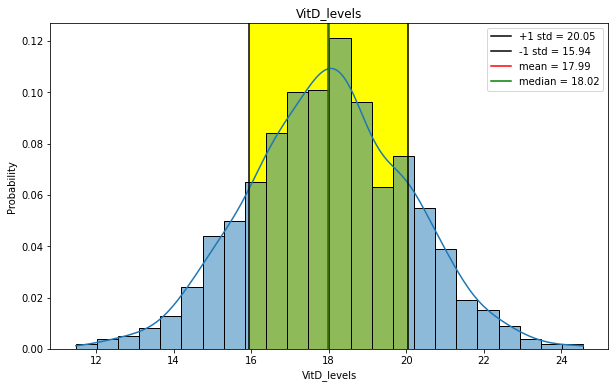

In [25]:
plot_func('VitD_levels',df)

Continuous Data, no skew, Mesokurtic 


Kurtosis value is: 2.99


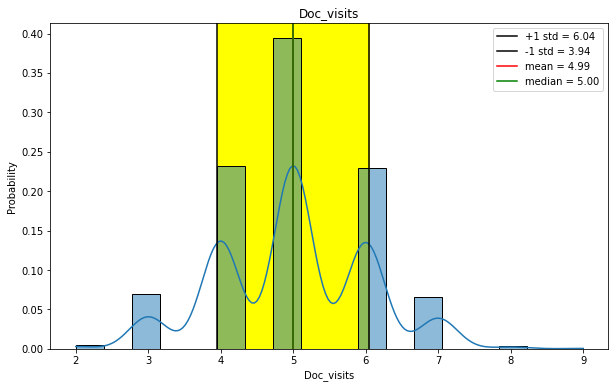

In [26]:
plot_func('Doc_visits',df)

Discrete Data, no skew, Mesokurtic 

Kurtosis value is: 3.27


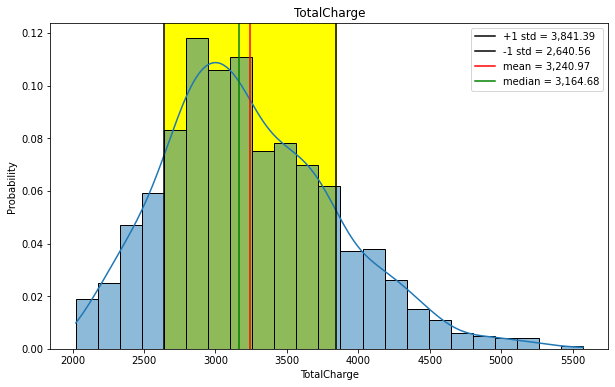

In [27]:
plot_func('TotalCharge',df)

Continuous Data, positively skew, Leptokurtic  